In [55]:
##!!!!!!!!Works with python 3.8, numpy 1.20.1 or 1.19.2 or 1.16.2 (this) and nbeats-forecast 1.3.7!!!!!!!!!!!
import os
import numpy as np
import pandas as pd
from torch import optim
import matplotlib.pyplot as plt
from nbeats_forecast import NBeats
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [56]:
#Load data
file = "C:/Users/gurpr/Videos/BetaSci/Rossmann_Store1_Data_FULL_NBeats.csv"
pwd = os.getcwd()
os.chdir(os.path.dirname(file))
data = pd.read_csv(os.path.basename(file))
data = data.values        #univariate time series data of shape nx1 (numpy array)

In [57]:
#Default Setting
model = NBeats(data=data, period_to_forecast=194, train_percent=0.75)
               #backcast_length=25, thetas_dims=[2,8], nb_blocks_per_stack=3)
model.fit(epoch=1000, verbose=1 )#optimiser=optim.AdamW(model.parameters,
#            lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False))
forecast = model.predict()

| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=582, forecast_length=194, share_thetas=False) at @2215238648016
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=582, forecast_length=194, share_thetas=False) at @2215238650272
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=582, forecast_length=194, share_thetas=False) at @2215238648160
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=582, forecast_length=194, share_thetas=False) at @2215238651328
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=582, forecast_length=194, share_thetas=False) at @2215238649168
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=582, forecast_length=194, share_thetas=False) at @2215238651808
grad_step = 000030, tr_loss = 0.228577, te_loss = 0.479414
grad_step = 000060, tr_loss = 0.065899, te_loss = 0

In [58]:
y_test = data[-194:, :]
#print(y_test)
rmse = mean_squared_error(y_test, forecast , squared=False)
mae = mean_absolute_error(y_test, forecast)
print("Rmse:" + str(rmse))
print("Mae: " + str(mae))

Rmse:1087.1785622696548
Mae: 788.4042465367268


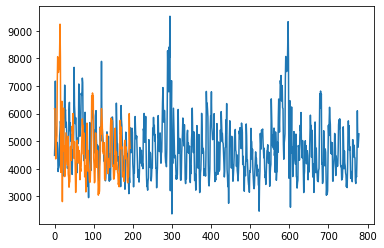

In [59]:
plt.plot(data)
#
plt.plot(forecast)
plt.show()

In [60]:
out = np.array(forecast, dtype=int)
out.round()
print(out)
#np.savetxt(r"C:\Users\gurpr\Videos\BetaSci\NBeats_Epocs1000_bl25_td72-8_hl128_wd001_lr0001_betas09-0.999.csv", out, delimiter=",", fmt='%.0i')

[[6177]
 [6174]
 [4870]
 [4355]
 [4834]
 [5059]
 [5206]
 [7171]
 [8058]
 [7754]
 [7490]
 [7788]
 [7599]
 [8305]
 [9240]
 [8046]
 [3868]
 [5938]
 [6392]
 [6442]
 [2808]
 [5343]
 [5031]
 [6196]
 [4629]
 [4818]
 [3715]
 [4005]
 [4604]
 [5300]
 [4927]
 [4577]
 [4287]
 [4138]
 [5177]
 [3804]
 [3690]
 [3330]
 [3494]
 [3532]
 [4768]
 [4809]
 [4767]
 [4299]
 [5093]
 [5536]
 [5359]
 [5999]
 [4984]
 [4677]
 [4374]
 [4976]
 [4599]
 [3970]
 [3140]
 [3603]
 [3931]
 [4570]
 [5029]
 [4349]
 [4795]
 [4205]
 [4476]
 [4658]
 [4491]
 [3602]
 [4012]
 [3900]
 [4089]
 [4671]
 [5266]
 [5807]
 [5475]
 [5568]
 [4525]
 [5299]
 [4702]
 [3706]
 [3866]
 [4095]
 [3159]
 [3723]
 [5076]
 [5652]
 [4865]
 [3915]
 [4661]
 [4091]
 [3899]
 [3582]
 [3510]
 [3516]
 [3919]
 [4034]
 [5135]
 [6647]
 [6165]
 [6746]
 [6620]
 [6642]
 [4388]
 [4139]
 [3492]
 [3548]
 [4132]
 [5297]
 [4665]
 [4183]
 [4047]
 [4667]
 [4629]
 [3700]
 [3043]
 [3332]
 [3107]
 [3198]
 [4232]
 [5478]
 [5240]
 [5736]
 [6180]
 [5874]
 [5631]
 [4621]
 [4842]
